In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import os
from sklearn.decomposition import PCA
import collections
from sklearn.metrics import adjusted_rand_score

/home/andranik/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = keras.applications.inception_v3.InceptionV3(weights='imagenet')

In [3]:
def load_labeled_data():
    images = []
    labels = []
    for img_name in os.listdir('./data'):
        label = img_name.split('.')[0]
        img = load_img('./data/%s' % img_name, target_size=(224, 224))
        img = img_to_array(img) / 255
        images.append(img)
        labels.append(label)
    return np.array(images), labels

images, labels = load_labeled_data()

cat


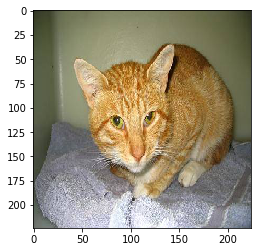

In [4]:
print(labels[1100])
plt.imshow(images[1100])
plt.show()

In [5]:
decode_predictions(model.predict(np.expand_dims(images[1100], axis=0)))

[[('n02123159', 'tiger_cat', 0.96727455),
  ('n02123045', 'tabby', 0.027427277),
  ('n02124075', 'Egyptian_cat', 0.005245106),
  ('n02127052', 'lynx', 1.1840623e-05),
  ('n03958227', 'plastic_bag', 9.123411e-06)]]

In [6]:
model.layers

In [7]:
intermediate_layer_model = keras.Model(inputs=model.input,
                                 outputs=model.get_layer(model.layers[-2].name).output)
intermediate_layer_model.output_shape

(None, 2048)

In [8]:
vectors = intermediate_layer_model.predict(images)
vectors.shape

(2000, 2048)

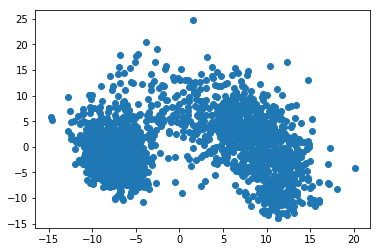

In [9]:
pca = PCA(n_components=4, svd_solver='full')
principal_components = pca.fit_transform(vectors)

plt.scatter(principal_components[:, 0], principal_components[:, 1])   
plt.show()

## KMeans

In [10]:
from sklearn.cluster import KMeans
predictions = KMeans(n_clusters=2, random_state=42).fit_predict(vectors)

acc = adjusted_rand_score(labels, predictions)
print('Adjusted Rand index:', acc)

Adjusted Rand index: 0.8500094005734246


## DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

predictions = DBSCAN(eps=5.35, min_samples=50, n_jobs=-1).fit_predict(principal_components)

acc = adjusted_rand_score(labels, predictions)
print('Adjusted Rand index:', acc)

Adjusted Rand index: 0.8268926701875724


## MeanShift

In [13]:
from sklearn.cluster import MeanShift

predictions = MeanShift().fit_predict(principal_components)

acc = adjusted_rand_score(labels, predictions)
print('Adjusted Rand index:', acc)

Adjusted Rand index: 0.8555531046830828


## AgglomerativeClustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

predictions = AgglomerativeClustering().fit_predict(vectors)

acc = adjusted_rand_score(labels, predictions)
print('Adjusted Rand index:', acc)

Adjusted Rand index: 0.877907924951102
